## Testing models

In [1]:
%load_ext autoreload
%autoreload 2
from comet_ml import API
from dotenv import load_dotenv
from xgboost import XGBClassifier
import pandas as pd
from ift6758.models.utils import preprocess, predict_model,download_model, compute_metrics
from ift6758.models.plotter import *
import os
from comet_ml import Experiment
from sklearn import metrics
import pickle


In [2]:
url = 'https://drive.google.com/file/d/1kM__riNHRPx5GsyuOH3yhiql3OZvwmuP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
df_test = df[df['season']==20192020]

In [4]:
df_test['type_season']

332742          playoffs
332743          playoffs
332744          playoffs
332745          playoffs
332746          playoffs
               ...      
406604    regular_season
406605    regular_season
406606    regular_season
406607    regular_season
406608    regular_season
Name: type_season, Length: 73867, dtype: object

# Saison réguliére

In [5]:
df_test_reg = df_test[df_test['type_season']=="regular_season"]

## Download of all registered models

In [6]:
# Question 5 :  XGBOOST

register_name = 'question5-3-grid-search-fts-selected-model' 
experiment_name = 'question5.3_grid_search_fts_selected'
download_model(register_name = register_name )

model_xgb_without_RDS = XGBClassifier()
model_xgb_without_RDS.load_model(f"../comet_models/{experiment_name}.json")

# Question 6 :  NN Best model

register_name = 'question6-smote-with-penalties-t-0-8-neuralnet-model' 
download_model(register_name = register_name )

experiment_name = 'question6_SMOTE_with_Penalties_t_0.8_NeuralNet'
filename = f'{experiment_name}.pkl'
model_NN = pickle.load(open(os.path.join('../comet_models',filename), 'rb'))

COMET INFO: Downloading registry model 'question5-3-grid-search-fts-selected-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'question6-smote-with-penalties-t-0-8-neuralnet-model', version '1.0.0', stage None from workspace 'princesslove'...
COMET INFO: Unzipping model to '/Users/salhilamia/Desktop/polytechnique Montréal/Maitrise/TRIMESTRE3/Cours/IFT6758/IFT6758_projet/project-template-main/comet_models' ...
COMET INFO: done!


## Predict on regular season

In [7]:
# question 5
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed']

# preprocess
X_test, Y_test ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = list_features, standarize=True)

y_test_pred_XGB,y_test_prob_XGB = predict_model(model_xgb_without_RDS,X_test)


In [8]:
# question 6
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed','powerplay','team_that_shot_nb','other_team_nb']

# preprocess
X_test_NN, Y_test_NN ,df_test_reg_preprocessed,_ =  preprocess(df_test_reg,features = list_features, standarize=True)

y_test_pred_NN,y_test_prob_NN = predict_model(model_NN,X_test_NN)
y_test_pred_NN = (y_test_prob_NN >= 0.8).astype(bool)


## Plot ALL

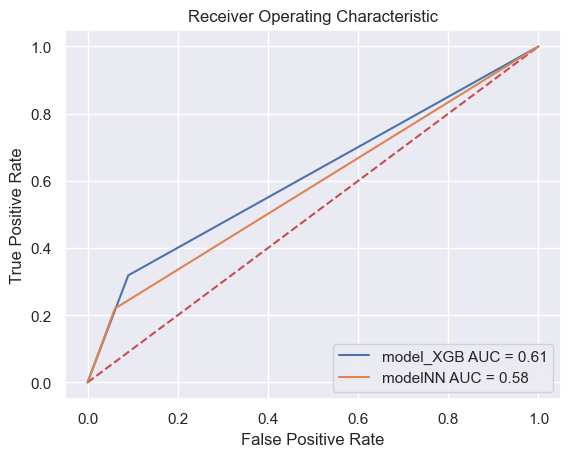

<Figure size 640x480 with 0 Axes>

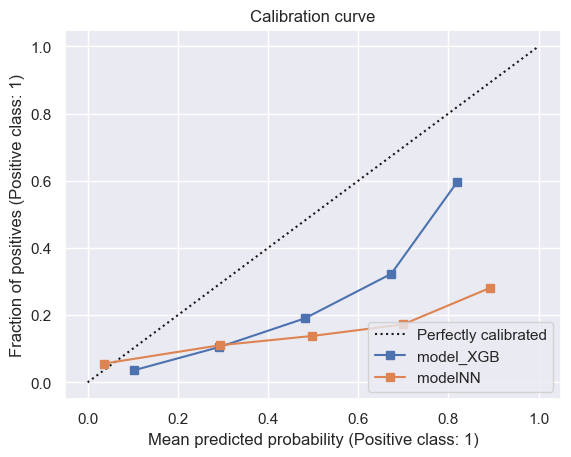

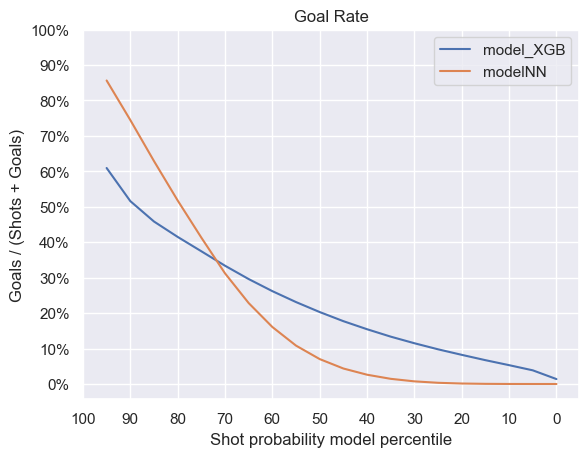

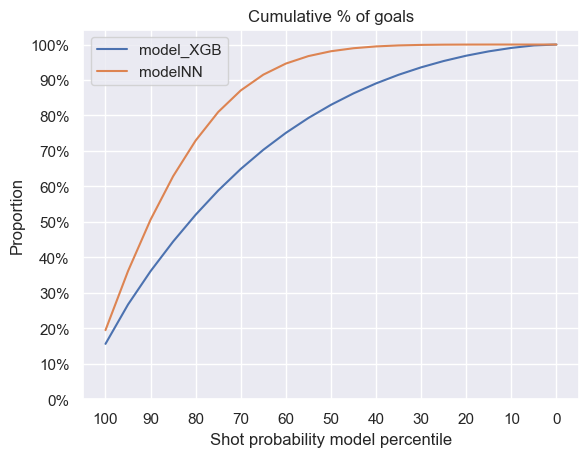

In [9]:
y_test_pred_list= [y_test_pred_XGB,y_test_pred_NN]
y_test_prob_list= [y_test_prob_XGB,y_test_prob_NN]

model_names = ['model_XGB','modelNN']

fig = log_ROC(Y_test,y_test_pred_list,model_names=model_names)
a = log_Calibration(Y_test,y_test_prob_list,model_names=model_names)
D = log_GoalRate(y_test_prob_list,model_names=model_names)
C = log_Cumulative(y_test_prob_list,model_names=model_names)

In [10]:
compute_metrics(Y_test,y_test_pred_list,model_names)

,model_name,Accuracy,Recall,Precision,f_score
0,model_XGB,0.852363,0.614205,0.600235,0.606379
1,modelNN,0.869644,0.579625,0.599351,0.587578


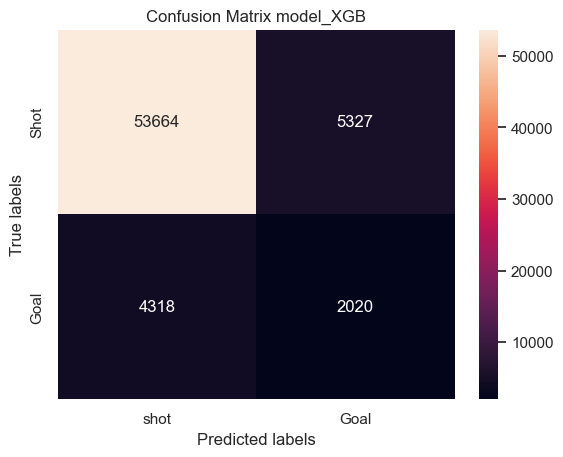

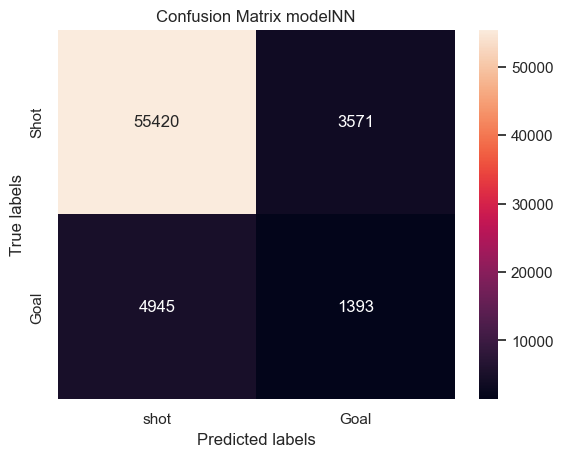

In [11]:

from sklearn.metrics import confusion_matrix

for y_test_pred, model in zip(y_test_pred_list,model_names):
    cm = confusion_matrix(Y_test,  y_test_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {model}'); 
    ax.xaxis.set_ticklabels(['shot', 'Goal']); ax.yaxis.set_ticklabels(['Shot', 'Goal']);
    plt.show()



# Predict on Off season

In [12]:
df_test_off = df_test[df_test['type_season']=="playoffs"]

In [13]:
# question 5
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed']

# preprocess
X_test, Y_test ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = list_features, standarize=True)

y_test_pred_XGB,y_test_prob_XGB = predict_model(model_xgb_without_RDS,X_test)

In [18]:
# question 6
list_features = ['empty_net', 'periodTime','period', 'x_coord', 'y_coord','distance','angle','shot_type',\
    'last_event_type', 'last_x_coord', 'last_y_coord','distance_from_last', 'seconds_since_last', \
        'rebound', 'angle_change','speed','powerplay','team_that_shot_nb','other_team_nb']



# preprocess
X_test_NN, Y_test_NN ,df_test_off_preprocessed,_ =  preprocess(df_test_off,features = list_features, standarize=True)

y_test_pred_NN,y_test_prob_NN = predict_model(model_NN,X_test_NN)
y_test_pred_NN = (y_test_prob_NN >= 0.8).astype(bool)

In [19]:
df_test_off_preprocessed.columns

Index(['empty_net', 'periodTime', 'period', 'x_coord', 'y_coord', 'distance',
       'angle', 'last_x_coord', 'last_y_coord', 'distance_from_last',
       'seconds_since_last', 'rebound', 'angle_change', 'speed', 'powerplay',
       'team_that_shot_nb', 'other_team_nb', 'shot_type_Backhand',
       'shot_type_Deflected', 'shot_type_Slap Shot', 'shot_type_Snap Shot',
       'shot_type_Tip-In', 'shot_type_Wrap-around', 'shot_type_Wrist Shot',
       'last_event_type_Blocked Shot', 'last_event_type_Faceoff',
       'last_event_type_Giveaway', 'last_event_type_Hit',
       'last_event_type_Missed Shot', 'last_event_type_Shot',
       'last_event_type_Takeaway', 'last_event_type_Goal',
       'last_event_type_Penalty'],
      dtype='object')

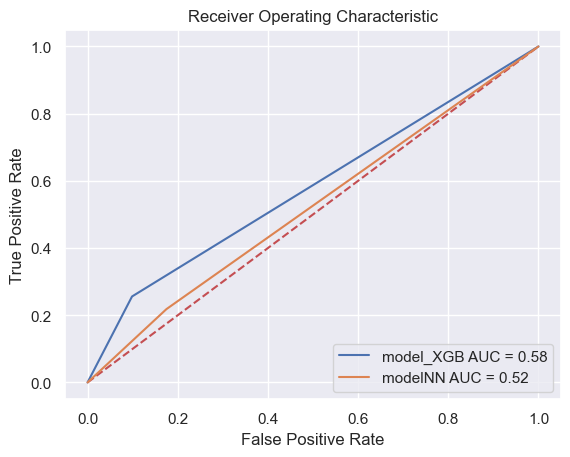

<Figure size 640x480 with 0 Axes>

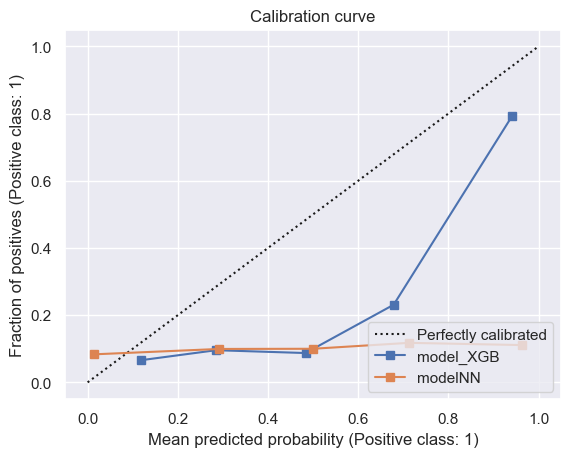

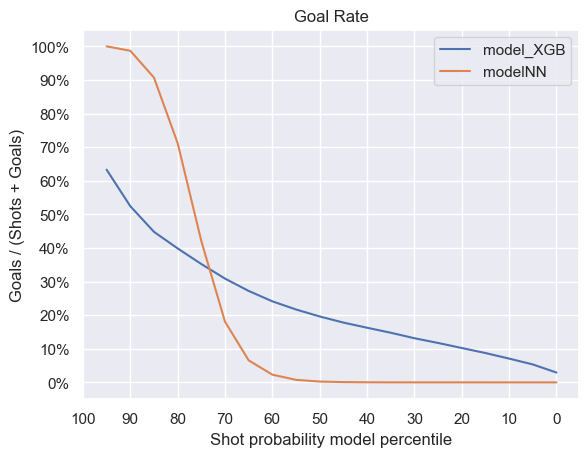

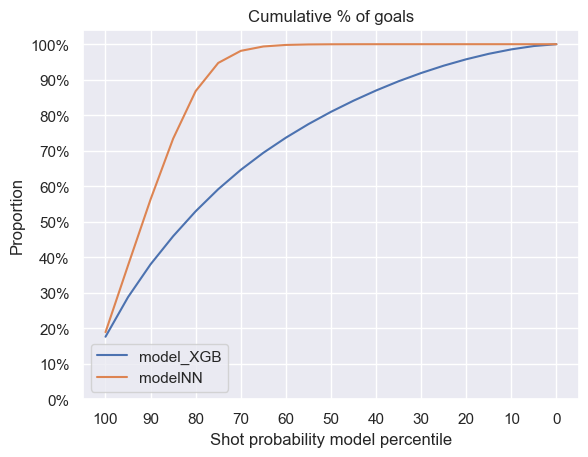

In [20]:
y_test_pred_list= [y_test_pred_XGB,y_test_pred_NN]
y_test_prob_list= [y_test_prob_XGB,y_test_prob_NN]

model_names = ['model_XGB','modelNN']

fig = log_ROC(Y_test,y_test_pred_list,model_names=model_names)
a = log_Calibration(Y_test,y_test_prob_list,model_names=model_names)
D = log_GoalRate(y_test_prob_list,model_names=model_names)
C = log_Cumulative(y_test_prob_list,model_names=model_names)

In [21]:
compute_metrics(Y_test,y_test_pred_list,model_names)

,model_name,Accuracy,Recall,Precision,f_score
0,model_XGB,0.842622,0.578604,0.564869,0.570324
1,modelNN,0.769806,0.521652,0.512186,0.507049


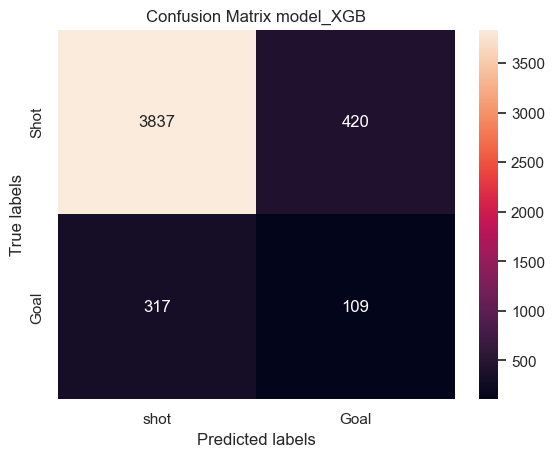

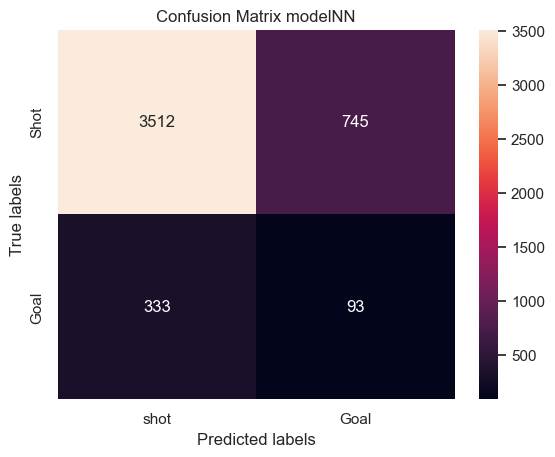

In [22]:
from sklearn.metrics import confusion_matrix

for y_test_pred, model in zip(y_test_pred_list,model_names):
    cm = confusion_matrix(Y_test,  y_test_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix {model}'); 
    ax.xaxis.set_ticklabels(['shot', 'Goal']); ax.yaxis.set_ticklabels(['Shot', 'Goal']);
    plt.show()